In [1]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format #소수점 2자리 까지는 보여라 
pd.options.display.max_rows = 10 #최대 개수로 보여줄 행 개수 지정 
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling algorithms
# General
import statsmodels.api as sm #통계 패키지
from scipy import stats #통계 모델링 

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics 평가 지표들
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

In [7]:
train=pd.read_csv('data/train.csv')

In [8]:
train.head()

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train=train.drop(['ID','제품','대분류','중분류','소분류','브랜드'],axis=1)

In [11]:
train.head()

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
date_index=list(train.columns)

In [13]:
date_index

['2022-01-01',
 '2022-01-02',
 '2022-01-03',
 '2022-01-04',
 '2022-01-05',
 '2022-01-06',
 '2022-01-07',
 '2022-01-08',
 '2022-01-09',
 '2022-01-10',
 '2022-01-11',
 '2022-01-12',
 '2022-01-13',
 '2022-01-14',
 '2022-01-15',
 '2022-01-16',
 '2022-01-17',
 '2022-01-18',
 '2022-01-19',
 '2022-01-20',
 '2022-01-21',
 '2022-01-22',
 '2022-01-23',
 '2022-01-24',
 '2022-01-25',
 '2022-01-26',
 '2022-01-27',
 '2022-01-28',
 '2022-01-29',
 '2022-01-30',
 '2022-01-31',
 '2022-02-01',
 '2022-02-02',
 '2022-02-03',
 '2022-02-04',
 '2022-02-05',
 '2022-02-06',
 '2022-02-07',
 '2022-02-08',
 '2022-02-09',
 '2022-02-10',
 '2022-02-11',
 '2022-02-12',
 '2022-02-13',
 '2022-02-14',
 '2022-02-15',
 '2022-02-16',
 '2022-02-17',
 '2022-02-18',
 '2022-02-19',
 '2022-02-20',
 '2022-02-21',
 '2022-02-22',
 '2022-02-23',
 '2022-02-24',
 '2022-02-25',
 '2022-02-26',
 '2022-02-27',
 '2022-02-28',
 '2022-03-01',
 '2022-03-02',
 '2022-03-03',
 '2022-03-04',
 '2022-03-05',
 '2022-03-06',
 '2022-03-07',
 '2022-03-

In [5]:
df1=pd.read_csv('data/time_series_data/df_big.csv')

In [6]:
df1

,B002-C001-0001,B002-C001-0002,B002-C001-0003,B002-C001-0004,B002-C001-0005
0,22.44,10.37,0.07,0.04,10.75
1,19.60,7.71,0.07,0.01,11.78
2,15.22,7.14,0.04,0.03,12.44
3,14.54,7.57,0.04,0.08,13.59
4,17.78,9.55,0.04,0.11,10.46
...,...,...,...,...,...
454,9.93,6.68,4.75,0.82,15.72
455,9.86,6.29,3.07,0.68,9.33
456,8.44,6.69,3.68,0.84,6.54
457,11.12,8.48,4.66,1.06,10.99


In [14]:
df1['datetime']=date_index

In [16]:
df1.dtypes

B002-C001-0001    float64
B002-C001-0002    float64
B002-C001-0003    float64
B002-C001-0004    float64
B002-C001-0005    float64
datetime           object
dtype: object

In [17]:
df1['datetime']=pd.to_datetime(df1['datetime'])

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   B002-C001-0001  459 non-null    float64       
 1   B002-C001-0002  459 non-null    float64       
 2   B002-C001-0003  459 non-null    float64       
 3   B002-C001-0004  459 non-null    float64       
 4   B002-C001-0005  459 non-null    float64       
 5   datetime        459 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 21.6 KB


In [20]:
df1.set_index('datetime',inplace=True)

In [21]:
df1

,B002-C001-0001,B002-C001-0002,B002-C001-0003,B002-C001-0004,B002-C001-0005
datetime,,,,,
2022-01-01,22.44,10.37,0.07,0.04,10.75
2022-01-02,19.60,7.71,0.07,0.01,11.78
2022-01-03,15.22,7.14,0.04,0.03,12.44
2022-01-04,14.54,7.57,0.04,0.08,13.59
2022-01-05,17.78,9.55,0.04,0.11,10.46
...,...,...,...,...,...
2023-03-31,9.93,6.68,4.75,0.82,15.72
2023-04-01,9.86,6.29,3.07,0.68,9.33
2023-04-02,8.44,6.69,3.68,0.84,6.54


In [22]:
df1.isnull().sum()

B002-C001-0001    0
B002-C001-0002    0
B002-C001-0003    0
B002-C001-0004    0
B002-C001-0005    0
dtype: int64

In [23]:
df1.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2023-03-26', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31', '2023-04-01', '2023-04-02',
               '2023-04-03', '2023-04-04'],
              dtype='datetime64[ns]', name='datetime', length=459, freq=None)

<Axes: xlabel='datetime'>

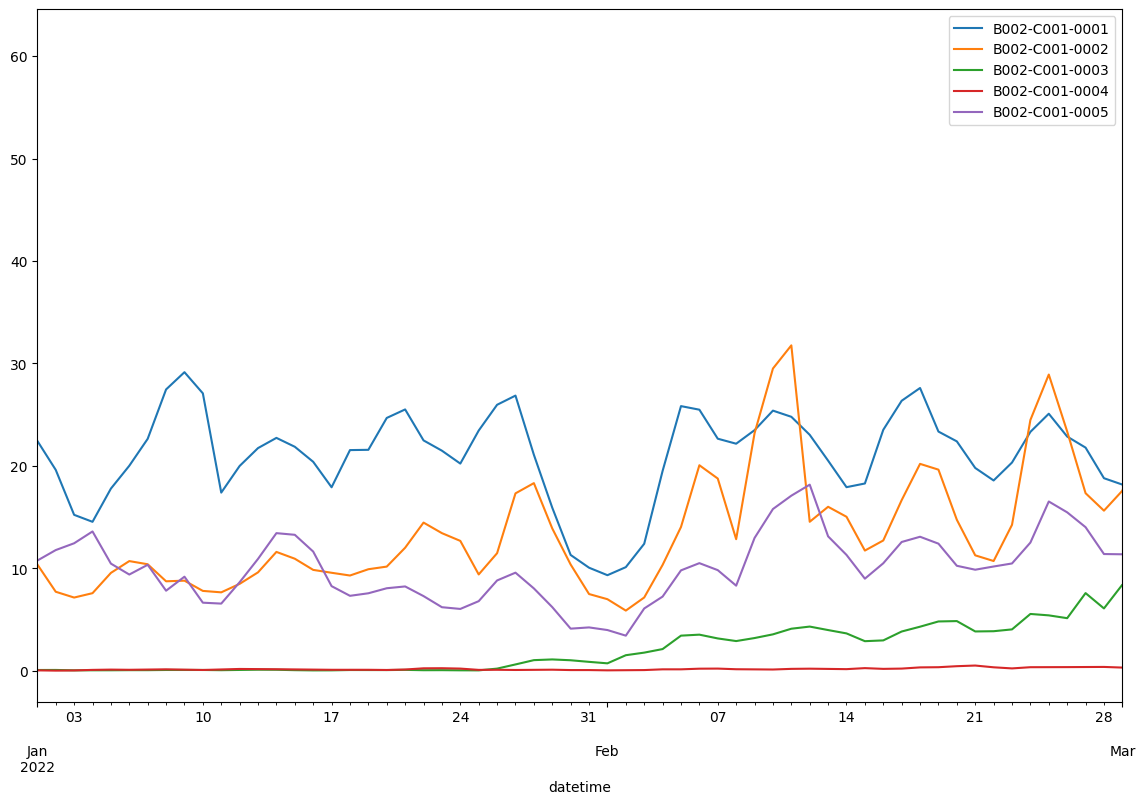

In [28]:
df1.plot(xlim=('2022-01-01','2022-03-01'))

<Axes: xlabel='datetime'>

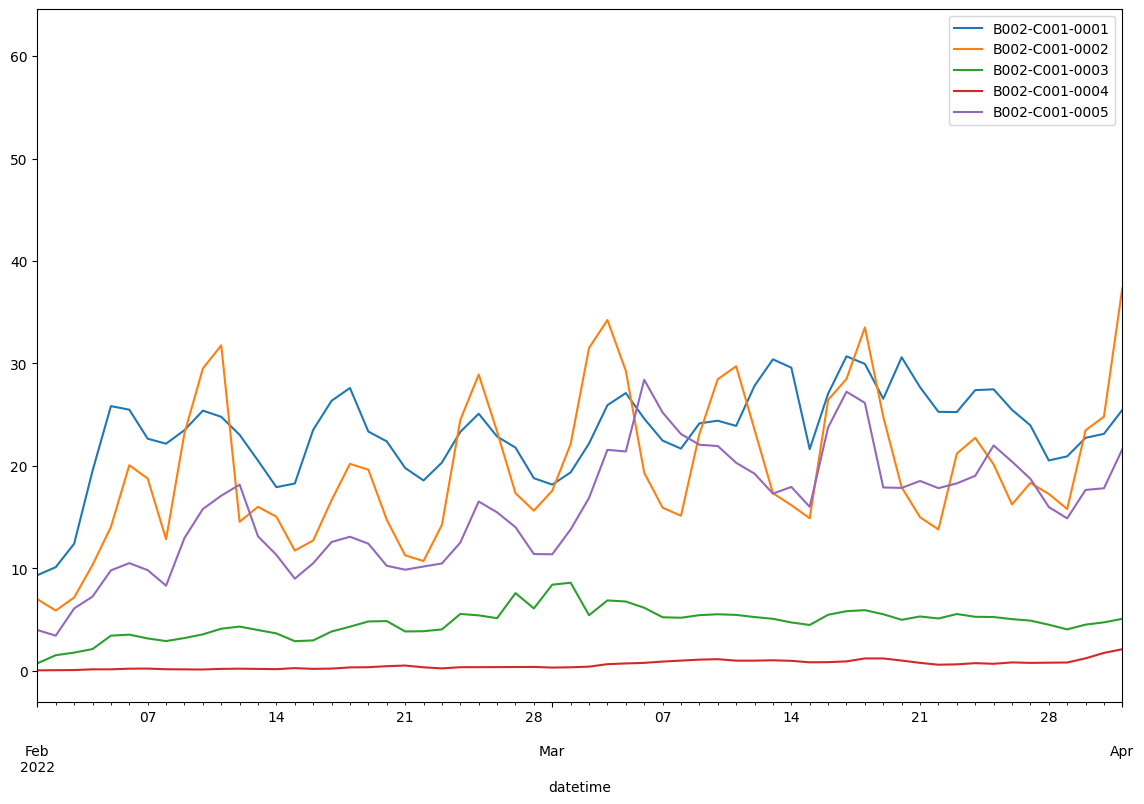

In [31]:
df1.plot(xlim=('2022-02-01','2022-04-01'))

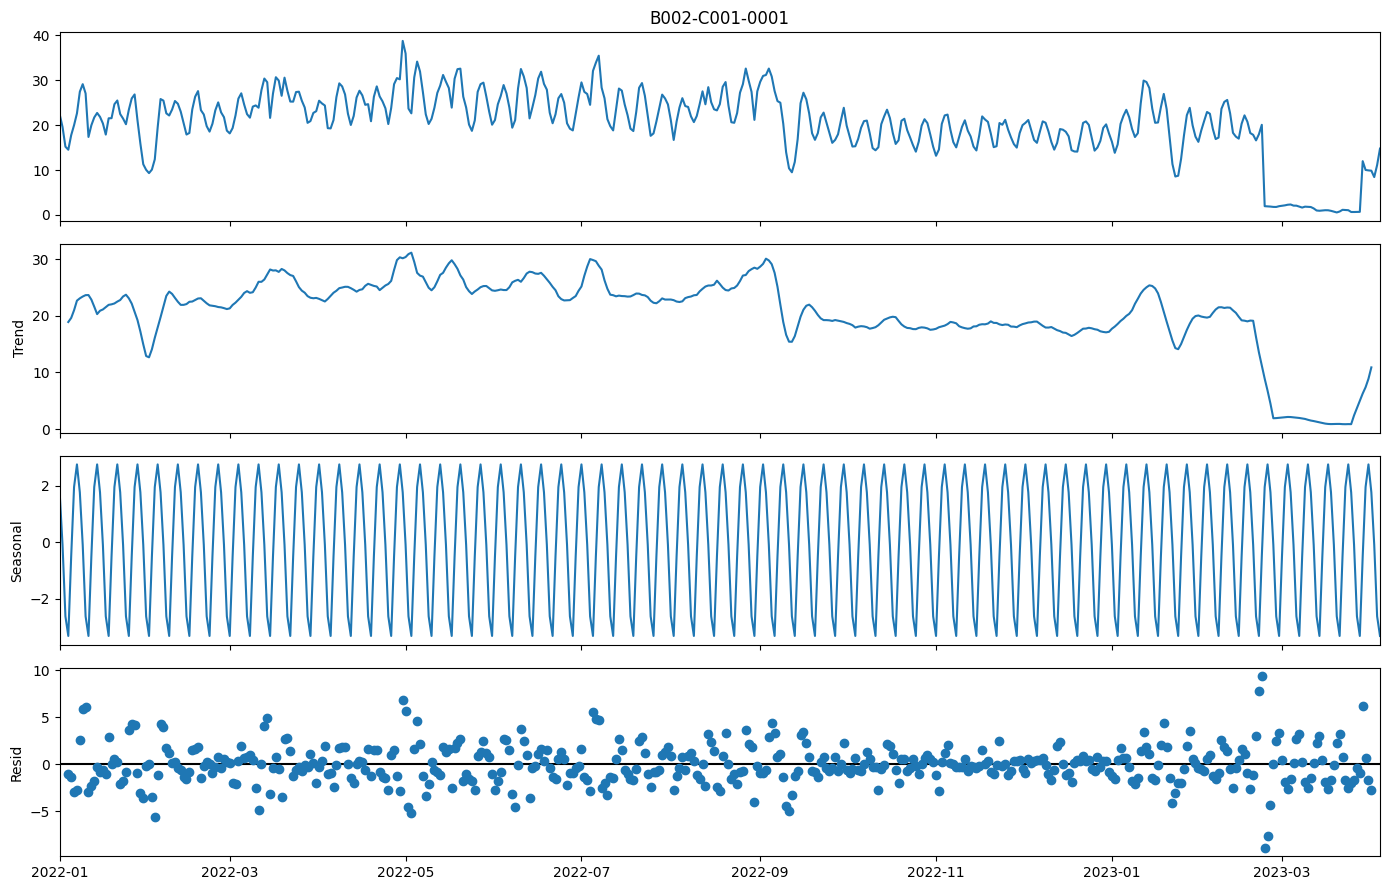

In [30]:
plt.rcParams['figure.figsize'] = (14, 9)
sm.tsa.seasonal_decompose(df1['B002-C001-0001'], model='additive').plot()
plt.show()